### 1. Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

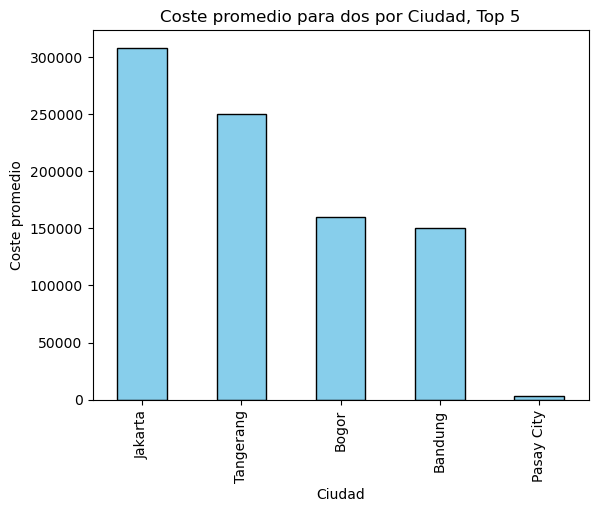

In [9]:
# Agrupar por ciudad y calcular el coste medio.
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending= False).head(5).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Coste promedio para dos por Ciudad, Top 5')
plt.xlabel('Ciudad')
plt.ylabel('Coste promedio')
plt.show()

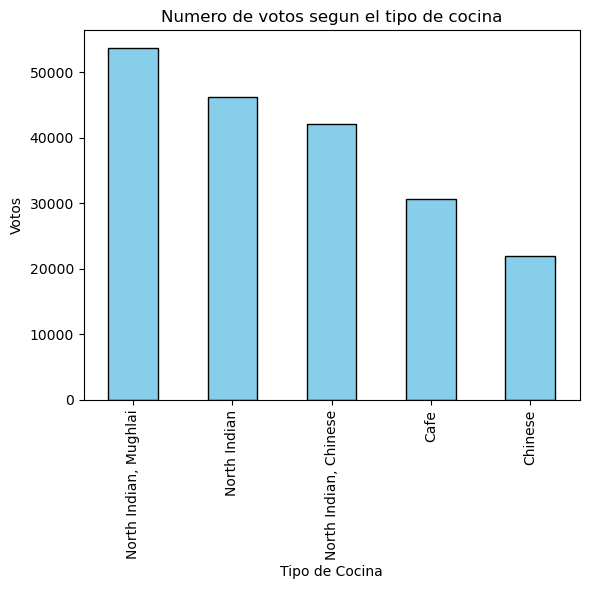

In [10]:
# Agrupar por cocinas(Tipo de cocinas que ofrece el restaurante) y número total de votos.
df.groupby('Cuisines')['Votes'].sum().sort_values(ascending= False).head(5).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Numero de votos segun el tipo de cocina')
plt.xlabel('Tipo de Cocina')
plt.ylabel('Votos')
plt.show()

d:\Descargas\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Descargas\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Descargas\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


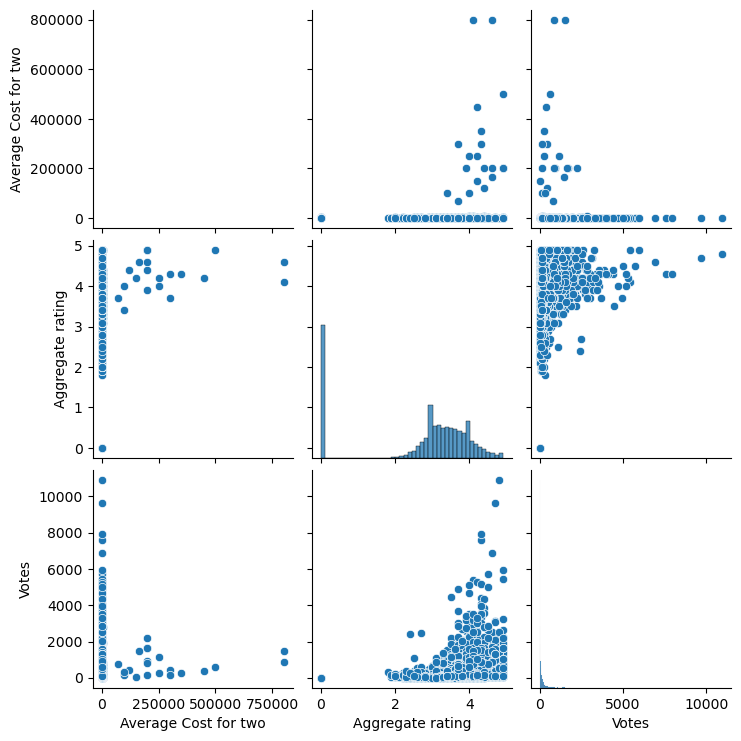

In [11]:
sns.pairplot(df[['Average Cost for two', 'Aggregate rating', 'Votes']])

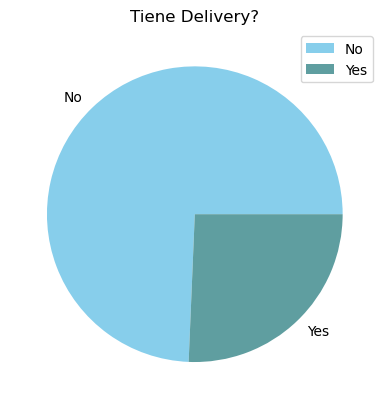

In [12]:
colors = ["skyblue", "cadetblue"]
df['Has Online delivery'].value_counts().plot(kind='pie', colors= colors)
plt.title('Tiene Delivery?')
plt.ylabel('')
plt.legend()
plt.show()

In [13]:
df[['Aggregate rating', 'Rating text']].sort_values(by='Aggregate rating', ascending= True).head(2300)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
8716,2.4,Poor
4953,2.4,Poor
1771,2.4,Poor
8467,2.4,Poor


In [14]:
df = df[df['Rating text'] != 'Not rated']

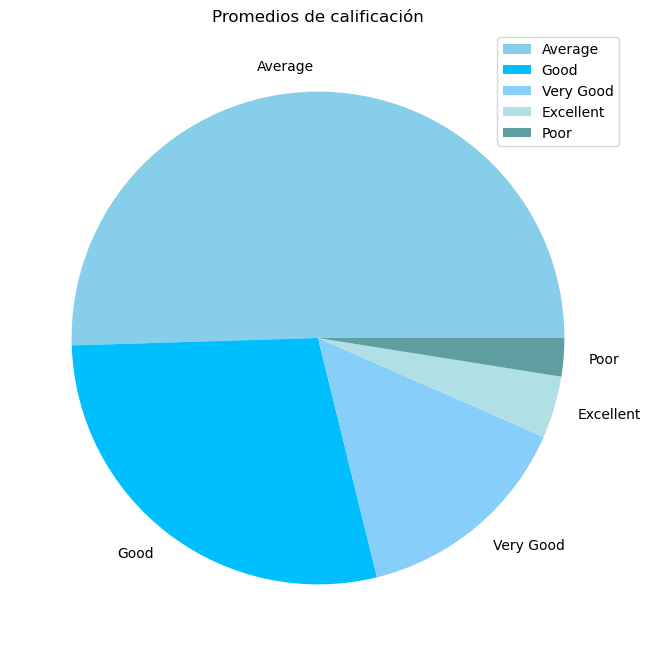

In [15]:
colors = ["skyblue", "deepskyblue", "lightskyblue", "powderblue", "cadetblue"]
plt.figure(figsize=(12,8))
df['Rating text'].value_counts().plot(kind='pie', colors= colors)
plt.title('Promedios de calificación')
plt.ylabel('')
plt.legend()
plt.show()

### 2. Feature Engineering

In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
X = df[['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range' ]]

In [18]:
# Por encima de 2 por debajo de 2.5 Poor
# Por encima de 2.5 por debajo de 3.5 Average
# Por encima de 3.5 por debajo de 4.0 Good
# Por encima de 4 por debajo de 4.5 Very Good
# Por encima de 4.5 Excelent

In [19]:
y = df[['Aggregate rating']]

In [20]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [21]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

Transformamos columnas categoricas en numericas.

In [22]:
X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_20128\4074334702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])


In [23]:
# Has Table booking 1 = Yes, 0 = No.
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [24]:
X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_20128\2959977150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])


In [25]:
# Has Online delivery 1 = Yes, 0 = No.
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [26]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X = scaler.fit_transform(X) # Obtenemos los valores ecalados.

In [29]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2) # 20% En el conjunto de prueba y 80% en el conjunto de entrenamiento.

### 3. Machine Learning

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [33]:
def modelresults(predictions):
    print('Mean absolute error on model is {}'.format(mean_absolute_error(y_test,predictions)))
    print('Root mean squared error on model is {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
predictionsfromlr = lr.predict(X_test)

In [37]:
modelresults(predictionsfromlr)

Mean absolute error on model is 0.3936741380678531
Root mean squared error on model is 0.49511416796828156


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [39]:
svrmodel = SVR()

In [40]:
param_gridsvr = {'C': [ 0.1, 0.5], 'kernel': ['linear', 'rbf','poly'], 'degree': [ 2 ] }

In [41]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, y_train)

d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
predsgridsvr = gridsvr.predict(X_test)

In [43]:
modelresults(predsgridsvr)


Mean absolute error on model is 0.37440522661028025
Root mean squared error on model is 0.4794258842828771


In [58]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
param_grid = {
    'max_depth': [10, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [55]:
tree_model = DecisionTreeRegressor()

In [56]:
grid_tree = GridSearchCV(estimator= tree_model, param_grid = param_grid)

In [60]:
grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [62]:
treepredictions = grid_tree.predict(X_test)

In [63]:
modelresults(treepredictions)

Mean absolute error on model is 0.35872510337613417
Root mean squared error on model is 0.4564565767213573


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rdrmodel = RandomForestRegressor()

In [67]:
param_gridrfr = {'max_depth': [5,15], 'n_estimators': [2,5,10] }

In [68]:
gridrfr = GridSearchCV(rdrmodel, param_gridrfr)

In [69]:
gridrfr.fit(X_train, y_train)


d:\Descargas\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [70]:
randomforestpredictions = gridrfr.predict(X_test)

In [71]:
modelresults(randomforestpredictions)

Mean absolute error on model is 0.35598351142339607
Root mean squared error on model is 0.4543711319439623


In [74]:
grid_tree.best_params_ # Para ver los mejores parametros

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {'n_neighbors': [15,16,17,18,19,20]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [107]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20]})

In [108]:
knn_predictions = knn_grid_search.predict(X_test)

In [109]:
modelresults(knn_predictions)

Mean absolute error on model is 0.36180621201890617
Root mean squared error on model is 0.4605766026267925


In [110]:
knn_grid_search.best_params_

{'n_neighbors': 20}

In [112]:
from sklearn.ensemble import AdaBoostRegressor

In [113]:
abr = AdaBoostRegressor()

In [117]:
abr_grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5],
}

In [118]:
abr_grid_search = GridSearchCV(abr, abr_grid_params)

In [119]:
abr_grid_search.fit(X_train, y_train)

d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5],
                         'n_estimators': [50, 100, 200]})

In [120]:
adapredictions = abr_grid_search.predict(X_test)

In [121]:
modelresults(adapredictions)

Mean absolute error on model is 0.36659542423827235
Root mean squared error on model is 0.46364381204344923


In [123]:
import joblib
joblib.dump(gridrfr,'mlmodel.pkl')

['mlmodel.pkl']

In [124]:
scaler

StandardScaler()

In [125]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']